## 4 Naive Bayes Classifier

In [2]:
from collections import *
import re
import csv
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import sklearn.metrics
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/caizhijun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
def tokenize(s):
    return s.split()
    

In [4]:
def train(xtrain,ytrain,smoothing_alpha):
    result = []
    data = []
    f = open(xtrain,'r')
    for line in f.readlines():
        result.append(tokenize(line))
        data.extend(tokenize(line)) 
    
    ytrain = open(ytrain,'r')
    y = []
    for l in ytrain:
        y.append(int(l))
    
    n = len(y)

    x_freq = Counter(data)

    px = {}
    py = Counter(y)

    px.update(x_freq)
    totaln = sum(x_freq.values())
    for key, value in px.items():
        px[key] = value/totaln


    for key,value in py.items():
        py[key] = value/n
        
    yword = defaultdict(list)
    for i in range(len(result)):
        if y[i] == 0:
            for w in result[i]:
                yword[0].append(w)
        elif y[i] == 1:
            for w in result[i]:
                yword[1].append(w)
                
    total0 = sum(Counter(yword[0]).values())
    total1 = sum(Counter(yword[1]).values())
    
    pxy0 = Counter(yword[0])
    v0 = len(pxy0)
    
    for key,value in pxy0.items():
        pxy0[key] = (value+smoothing_alpha)/(total0+v0*smoothing_alpha)
    
    pxy1 = Counter(yword[1])
    v1 = len(pxy1)
        
    for key,value in pxy1.items():
        pxy1[key] = (value+smoothing_alpha)/(total1+v1*smoothing_alpha)
    
            
    
    return px,py,pxy0,pxy1

In [5]:
train('X_train.txt','y_train.txt',smoothing_alpha=0)


({'how': 0.002004718501424575,
  'many': 0.0005865896579731071,
  'glasses': 3.223020098753336e-05,
  'of': 0.008470096819523766,
  'water': 7.090644217257339e-05,
  'do': 0.00460891874121727,
  'you': 0.02128482473216703,
  'drink': 0.00017404308533268013,
  'a': 0.019840911727925535,
  'day?': 8.379852256758674e-05,
  'oh.': 3.223020098753336e-05,
  'yeah.': 0.0001611510049376668,
  'no': 0.002172315546559748,
  'loving': 5.801436177756004e-05,
  'for': 0.007090644217257339,
  'nikki.': 3.867624118504003e-05,
  'poor': 0.0001611510049376668,
  "she's": 0.0002062732863202135,
  'too': 0.0014568050846365077,
  'emo.': 6.446040197506672e-05,
  'Yes.': 0.0001353668441476401,
  'all': 0.003100545335000709,
  'the': 0.022438665927520723,
  'time': 0.0014374669640439877,
  ':)': 0.0030940992948032026,
  'Why': 0.000451222813825467,
  'people': 0.0018951358180669614,
  'think': 0.0025655239986076554,
  'that': 0.012002526847757423,
  'swaying': 6.446040197506672e-06,
  'their': 0.00072840254

In [6]:
def classify(x_test,x_train,y_train,smoothing_alpha):
    prob = train(x_train,y_train,smoothing_alpha)
    myx = open(x_test, 'r')
    xdev =[]
    for line in myx.readlines():
        xdev.append(tokenize(line))
        
    cls = {}
    
    for i in range(len(xdev)):
        p0 = 1
        p1 = 1
        for word in xdev[i]:
            
            try:
                pp0 = prob[2][word]*prob[1][0]/prob[0][word]
            except:
                pp0 = 0
            
            try:
                pp1 = prob[3][word]*prob[1][1]/prob[0][word]
            except:
                pp1 = 0
            p0 = pp0 * p0
            p1 = pp1 * p1

        if p0 > p1:
            cls[i]=0
        elif p0 < p1:
            cls[i]=1
        else:
            cls[i]=0
            
    return cls

In [7]:
cls_dev = classify('X_dev.txt','X_train.txt','y_train.txt',smoothing_alpha = 7)

In [8]:
pred=list(cls_dev.values())


In [9]:
file2 = open('y_dev.txt', "r")
ytrue = [int(x) for x in file2.readlines()]


In [10]:
c = 0
for i in range(len(ytrue)):
    if pred[i] == ytrue[i]:
        c += 1

In [11]:
c/2000

0.949

In [12]:
import sklearn.metrics
sklearn.metrics.f1_score(ytrue,pred)

0.9321808510638298

In [13]:
f1score = []
smoothing = np.arange(0,8,1).tolist()
for x in smoothing:
    output = classify('X_dev.txt','X_train.txt','y_train.txt',x)
    pred = list(output.values())
    f1 = sklearn.metrics.f1_score(ytrue,pred)
    f1score.append(f1)

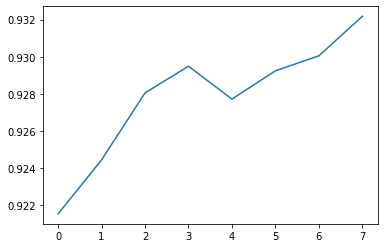

In [14]:
plt.plot(smoothing,f1score)

In [15]:
file3 = open('X_test.txt','r')
xtest =[]
for l in file3.readlines():
    xtest.append(tokenize(l))


In [16]:
with open('NBresult.csv', 'w', newline = '') as NB :
    writer = csv.writer(NB)
    writer.writerow(["Id", "Category"])
    clsf = classify('X_test.txt','X_train.txt','y_train.txt',smoothing_alpha = 7)
    for key,value in clsf.items():
        writer.writerow([key,value])
NB.close()

In [17]:
def better_tokenize(s):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  
        u"\U0001F300-\U0001F5FF"  
        u"\U0001F680-\U0001F6FF"  
        u"\U0001F1E0-\U0001F1FF"  
        u"\U0001F1F2-\U0001F1F4"  
        u"\U0001F1E6-\U0001F1FF"  
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F620"
        u"\u200d"
        u"\u2640-\u2642"
        "]+", flags=re.UNICODE)
    c = emoji_pattern.sub(r'',s)
    c = re.sub(r'https?:\/\/[a-zA-Z0-9-_]+\.[a-zA-Z]+\/?([a-zA-Z0-9-_]+)?','',c)
    c = re.sub(r'@+','a',c)
    c = c.lower()
    c = re.sub('[^A-Za-z0-9\s]+','', c)
    c = re.sub(r'[0-9]+','',c)
    c = c.split()
    stop_words = set(stopwords.words('english'))
    for w in c:
        if w in stop_words:
            c.remove(w)
    return c

In [18]:
better_tokenize('http://twitpic.com/py9p - HER ass is \U0001F620 on top http://tinyurl.com/7b7nze &0000')

['ass', 'on', 'top']

In [19]:
def train_b(xtrain,ytrain,smoothing_alpha):
    result = []
    data = []
    f = open(xtrain,'r')
    for line in f.readlines():
        result.append(better_tokenize(line))
        data.extend(better_tokenize(line)) 
    
    ytrain = open(ytrain,'r')
    y = []
    for l in ytrain:
        y.append(int(l))
    
    n = len(y)

    x_freq = Counter(data)

    px = {}
    py = Counter(y)

    px.update(x_freq)
    totaln = sum(x_freq.values())
    for key, value in px.items():
        px[key] = value/totaln


    for key,value in py.items():
        py[key] = value/n
        
    yword = defaultdict(list)
    for i in range(len(result)):
        if y[i] == 0:
            for w in result[i]:
                yword[0].append(w)
        elif y[i] == 1:
            for w in result[i]:
                yword[1].append(w)
                
    total0 = sum(Counter(yword[0]).values())
    total1 = sum(Counter(yword[1]).values())
    
    pxy0 = Counter(yword[0])
    v0 = len(pxy0)
    
    for key,value in pxy0.items():
        pxy0[key] = (value+smoothing_alpha)/(total0+v0*smoothing_alpha)
    
    pxy1 = Counter(yword[1])
    v1 = len(pxy1)
    
    for key,value in pxy1.items():
        pxy1[key] = (value+smoothing_alpha)/(total1+v1*smoothing_alpha)

            
    
    return px,py,pxy0,pxy1

In [20]:
train_b('X_train.txt','y_train.txt',smoothing_alpha=0)

({'many': 0.0009214289827807958,
  'glasses': 7.678574856506633e-05,
  'water': 0.00022075902712456567,
  'you': 0.014051791987407138,
  'drink': 0.0003071429942602653,
  'day': 0.0018428579655615917,
  'oh': 0.0030138406311788534,
  'yeah': 0.0028506709154780875,
  'loving': 0.00012477684141823278,
  'nikki': 6.718752999443303e-05,
  'poor': 0.00034553586854279845,
  'shes': 0.0005758931142379974,
  'emo': 0.0009406254199220625,
  'yes': 0.0027546887297717542,
  'the': 0.015501122991572764,
  'time': 0.0030522335054613864,
  'do': 0.003944867832530282,
  'people': 0.003436162248286718,
  'think': 0.004108037548231048,
  'swaying': 9.598218570633291e-06,
  'arm': 6.718752999443303e-05,
  'back': 0.001814063309849692,
  'forth': 1.9196437141266582e-05,
  'would': 0.005403797055266542,
  'change': 0.0005375002399554642,
  'direction': 1.9196437141266582e-05,
  'a': 0.013581479277446106,
  'bowling': 2.879465571189987e-05,
  'ball': 2.879465571189987e-05,
  'damn': 0.013581479277446106,
 

In [27]:
def classify_b(x_test,x_train,y_train,smoothing_alpha):
    prob = train_b(x_train,y_train,smoothing_alpha)
    myx = open(x_test, 'r')
    xdev =[]
    for line in myx.readlines():
        xdev.append(tokenize(line))
        
    cls = {}
    
    for i in range(len(xdev)):
        p0 = 1
        p1 = 1
        for word in xdev[i]:
            
            try:
                pp0 = prob[2][word]*prob[1][0]/prob[0][word]
            except:
                pp0 = 0
            
            try:
                pp1 = prob[3][word]*prob[1][1]/prob[0][word]
            except:
                pp1 = 0
            p0 = pp0 * p0
            p1 = pp1 * p1

        if p0 > p1:
            cls[i]=0
        elif p0 < p1:
            cls[i]=1
        else:
            cls[i]=0
            
    return cls

In [28]:
cls_b=classify_b('X_dev.txt','X_train.txt','y_train.txt',smoothing_alpha = 7)

In [29]:
pred_b=list(cls_b.values())


In [30]:
import sklearn.metrics
sklearn.metrics.f1_score(ytrue,pred_b)

0.05658056580565806

In [31]:
d = 0
for i in range(len(ytrue)):
    if pred_b[i] == ytrue[i]:
        d += 1

In [32]:
d/2000

0.6165